In [10]:
# -*- coding: utf-8 -*-

import pandas as pd
from pandas import DataFrame
import numpy as np

#assigning the AQI and PM Concentration range
AQIHi = [50,100,150,200,300,400,500]
AQILo=[0,51,101,151,201,301,401]
ConcHi=[20,40,60,160,260,360,500]
ConcLo=[0,20.1,40.1,60.1,160.1,260.1,360.1]
AQIcat=["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous","Very Hazardous"]

#reading excel file
poll=pd.read_csv("Ratnapark_AQMS_Data 2020_PM2_5.csv")
poll.head()

,Station,Longitude,Latitude,DateTime,Tmp_Max,Temp_Min,Temp_Avg,RH_Max,RH_Min,RH_Avg,...,Wd_Max,Wd_Min,Wd_Avg,Ws_Max,Ws_Min,Ws_Average,PM2.5_Max,PM2.5_Min,PM2.5_Avg,AQI Category
0,Ratnapark,85.31,27.7,01/01/2020 00,6.7,6.4,6.53,75.599998,71.699997,73.85,...,354.7,0.0,106.86,1.2,0.0,0.36,209.8000031,154.6999969,175.77,NaN
1,Ratnapark,85.31,27.7,01/01/2020 01,6.4,6.0,6.22,76.900002,75.300003,76.30,...,355.2,0.0,110.05,1.3,0.0,0.35,204.8000031,119.4000015,163.59,NaN
2,Ratnapark,85.31,27.7,01/01/2020 02,6.6,5.8,6.25,79.400002,76.300003,78.21,...,348.7,0.0,116.30,1.5,0.0,0.54,179.6999969,114.5999985,135.97,NaN
3,Ratnapark,85.31,27.7,01/01/2020 03,6.0,5.1,5.61,81.400002,77.099998,78.57,...,242.7,0.0,131.14,1.1,0.0,0.47,166.3000031,106.0999985,124.88,NaN
4,Ratnapark,85.31,27.7,01/01/2020 04,5.2,4.6,4.92,85.199997,82.300003,83.74,...,335.6,0.0,90.11,0.7,0.0,0.28,190.1000061,117.1999969,140.43,NaN


In [4]:
poll['PM2.5_Avg'] = pd.to_numeric(poll['PM2.5_Avg'],errors='coerce')
#print(poll.dtypes)

#assigning PM2.5 average and AQI to variables
x = poll[['PM2.5_Avg']]

y = poll[['AQI Category']]
poll.rename(columns = {'AQI Category':'AQI_PM2.5'}, inplace = True) 
poll['AQI Category'] = '' 

x_num=len(x)
#print(x_num)

i=0
AQ=[]
for i in range(x_num):
    pollution = x.iloc[i]['PM2.5_Avg'] #extracting the PM2.5 value into a variable
    #print(pollution)
    #print(type(pollution))
    len_num=0
    len_num=len(AQIHi)
    for j in range(len_num):
        if pollution<ConcHi[j] and pollution>=ConcLo[j]: #finding the exact range of the measured PM2.5 value
            z=(ConcLo[j])
            
            ind=ConcLo.index(z) #finding out the index of the PM2.5 range to be used for AQI calculation
            
            #extracting the respective upper and lower limit values for the index
            CH=ConcHi[ind]
            CL=ConcLo[ind]
            AH=AQIHi[ind]
            AL=AQILo[ind]
            
            #AQI calculation
            try:
                y=((AH-AL)/(CH-CL))*(pollution-CL)+(AL)
            except ZeroDivisionError:
                print ('NA')
            AQI=int(round(y,0)) #rounding off the AQI values with 0 decimal place
            #print(AQI)
            
            
            #appending the AQI values to AQI Category
            poll['AQI_PM2.5'].iloc[i] = AQI
            poll['AQI Category'].iloc[i] = AQIcat[j]
print(poll)

#exporting the data frame with calculated AQI to excel
poll.to_excel (r"C:/Users/Dell/Downloads/new1_Compiled sheet of Ratnapark Data 2020_PM2.5.xlsx", index = False, header=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


        Station  Longitude  Latitude       DateTime    Tmp_Max   Temp_Min  \
0     Ratnapark      85.31      27.7  01/01/2020 00   6.700000   6.400000   
1     Ratnapark      85.31      27.7  01/01/2020 01   6.400000   6.000000   
2     Ratnapark      85.31      27.7  01/01/2020 02   6.600000   5.800000   
3     Ratnapark      85.31      27.7  01/01/2020 03   6.000000   5.100000   
4     Ratnapark      85.31      27.7  01/01/2020 04   5.200000   4.600000   
5     Ratnapark      85.31      27.7  01/01/2020 05   5.000000   4.500000   
6     Ratnapark      85.31      27.7  01/01/2020 06   4.800000   4.600000   
7     Ratnapark      85.31      27.7  01/01/2020 07   5.000000   4.400000   
8     Ratnapark      85.31      27.7  01/01/2020 08   8.500000   5.200000   
9     Ratnapark      85.31      27.7  01/01/2020 09  11.400000   8.800000   
10    Ratnapark      85.31      27.7  01/01/2020 10  12.800000  10.600000   
11    Ratnapark      85.31      27.7  01/01/2020 11  16.500000  12.900000   

In [22]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#reading excel file
df=pd.read_excel("new1_Compiled sheet of Ratnapark Data 2020_PM2.5.xlsx")
df.head(10)

,Station,Longitude,Latitude,DateTime,Tmp_Max,Temp_Min,Temp_Avg,RH_Max,RH_Min,RH_Avg,...,Wd_Min,Wd_Avg,Ws_Max,Ws_Min,Ws_Average,PM2.5_Max,PM2.5_Min,PM2.5_Avg,AQI_PM2.5,AQI Category
0,Ratnapark,85.31,27.7,01/01/2020 00,6.7,6.4,6.53,75.599998,71.699997,73.85,...,0.0,106.86,1.2,0.0,0.36,209.8000031,154.6999969,175.77,217.0,Very Unhealthy
1,Ratnapark,85.31,27.7,01/01/2020 01,6.4,6.0,6.22,76.900002,75.300003,76.30,...,0.0,110.05,1.3,0.0,0.35,204.8000031,119.4000015,163.59,204.0,Very Unhealthy
2,Ratnapark,85.31,27.7,01/01/2020 02,6.6,5.8,6.25,79.400002,76.300003,78.21,...,0.0,116.30,1.5,0.0,0.54,179.6999969,114.5999985,135.97,188.0,Unhealthy
3,Ratnapark,85.31,27.7,01/01/2020 03,6.0,5.1,5.61,81.400002,77.099998,78.57,...,0.0,131.14,1.1,0.0,0.47,166.3000031,106.0999985,124.88,183.0,Unhealthy
4,Ratnapark,85.31,27.7,01/01/2020 04,5.2,4.6,4.92,85.199997,82.300003,83.74,...,0.0,90.11,0.7,0.0,0.28,190.1000061,117.1999969,140.43,190.0,Unhealthy
5,Ratnapark,85.31,27.7,01/01/2020 05,5.0,4.5,4.77,87.300003,84.800003,85.81,...,0.0,72.51,0.8,0.0,0.23,185.1999969,119.6999969,135.55,188.0,Unhealthy
6,Ratnapark,85.31,27.7,01/01/2020 06,4.8,4.6,4.69,87.900002,85.400002,86.21,...,0.0,131.22,1.1,0.0,0.43,199.8999939,155.1000061,172.65,213.0,Very Unhealthy
7,Ratnapark,85.31,27.7,01/01/2020 07,5.0,4.4,4.63,87.599998,85.599998,86.96,...,0.0,139.02,1.2,0.0,0.43,208.3000031,156,182.61,223.0,Very Unhealthy
8,Ratnapark,85.31,27.7,01/01/2020 08,8.5,5.2,6.38,85.099998,75.599998,80.83,...,0.0,159.02,1.5,0.0,0.73,214.3000031,163.6999969,187.26,228.0,Very Unhealthy
9,Ratnapark,85.31,27.7,01/01/2020 09,11.4,8.8,10.38,75.699997,61.299999,66.83,...,0.0,184.92,2.0,0.0,0.73,195.5,76.40000153,164.05,205.0,Very Unhealthy


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5082 entries, 0 to 5081
Data columns (total 27 columns):
Station         5082 non-null object
Longitude       5082 non-null float64
Latitude        5082 non-null float64
DateTime        5082 non-null object
 Tmp_Max        5082 non-null float64
 Temp_Min       5082 non-null float64
 Temp_Avg       5082 non-null float64
 RH_Max         5082 non-null float64
 RH_Min         5082 non-null float64
 RH_Avg         5082 non-null float64
 Pre_Max        5082 non-null float64
 Pre_Min        5082 non-null float64
 Pre_Avg        5082 non-null float64
 PP_Max         5082 non-null float64
 PP_Min         5082 non-null float64
 PP_Avg         5082 non-null float64
 Wd_Max         5082 non-null float64
 Wd_Min         5082 non-null float64
 Wd_Avg         5082 non-null float64
 Ws_Max         5082 non-null float64
 Ws_Min         5082 non-null float64
 Ws_Average     5082 non-null float64
 PM2.5_Max      5082 non-null object
 PM2.5_Min      5082 n

In [9]:
#How can we fill the missing value of PM2.5_avg with mean value.
#..... code plz 

In [12]:
print("df.shape : ", df.shape)

df.shape :  (5082, 27)


In [13]:
print(df.columns)

Index(['Station', 'Longitude', 'Latitude', 'DateTime', ' Tmp_Max', ' Temp_Min',
       ' Temp_Avg', ' RH_Max', ' RH_Min', ' RH_Avg', ' Pre_Max', ' Pre_Min',
       ' Pre_Avg', ' PP_Max', ' PP_Min', ' PP_Avg', ' Wd_Max', ' Wd_Min',
       ' Wd_Avg', ' Ws_Max', ' Ws_Min', ' Ws_Average', ' PM2.5_Max',
       ' PM2.5_Min', 'PM2.5_Avg', 'AQI_PM2.5', 'AQI Category'],
      dtype='object')


In [17]:
df[df['PM2.5_Avg'].isnull()]

,Station,Longitude,Latitude,DateTime,Tmp_Max,Temp_Min,Temp_Avg,RH_Max,RH_Min,RH_Avg,...,Wd_Min,Wd_Avg,Ws_Max,Ws_Min,Ws_Average,PM2.5_Max,PM2.5_Min,PM2.5_Avg,AQI_PM2.5,AQI Category
1840,Ratnapark,85.31,27.7,03/17/2020 16,22.799999,21.500000,22.25,50.400002,44.099998,46.86,...,15.100000,254.03,5.6,0.3,1.68,,,NaN,NaN,NaN
1841,Ratnapark,85.31,27.7,03/17/2020 17,21.600000,19.299999,20.45,57.099998,50.299999,53.87,...,0.000000,233.30,3.6,0.0,1.38,,,NaN,NaN,NaN
1842,Ratnapark,85.31,27.7,03/17/2020 18,19.299999,17.799999,18.43,65.099998,56.900002,60.77,...,0.000000,176.31,2.2,0.0,1.03,,,NaN,NaN,NaN
1843,Ratnapark,85.31,27.7,03/17/2020 19,17.799999,17.200001,17.49,66.699997,62.299999,63.94,...,0.000000,184.39,2.3,0.0,0.96,,,NaN,NaN,NaN
1844,Ratnapark,85.31,27.7,03/17/2020 20,17.200001,16.100000,16.74,70.699997,63.099998,67.34,...,0.000000,159.46,2.4,0.0,0.90,,,NaN,NaN,NaN
1845,Ratnapark,85.31,27.7,03/17/2020 21,16.200001,15.400000,15.84,73.599998,69.900002,71.21,...,0.000000,187.40,1.6,0.0,0.65,,,NaN,NaN,NaN
1846,Ratnapark,85.31,27.7,03/17/2020 22,15.400000,14.400000,14.96,78.000000,73.300003,75.00,...,0.000000,156.25,1.4,0.0,0.66,,,NaN,NaN,NaN
1847,Ratnapark,85.31,27.7,03/17/2020 23,14.400000,13.400000,13.88,81.500000,78.000000,80.00,...,0.000000,166.00,1.6,0.0,0.68,,,NaN,NaN,NaN
1848,Ratnapark,85.31,27.7,03/18/2020 00,13.400000,12.900000,13.12,82.900002,81.599998,82.42,...,0.000000,163.69,0.9,0.0,0.52,,,NaN,NaN,NaN
1849,Ratnapark,85.31,27.7,03/18/2020 01,12.800000,12.300000,12.59,82.699997,81.500000,82.03,...,0.000000,165.63,1.1,0.0,0.56,,,NaN,NaN,NaN


In [23]:
df.fillna(method='ffill', inplace = True)

In [24]:
from matplotlib import rcParams

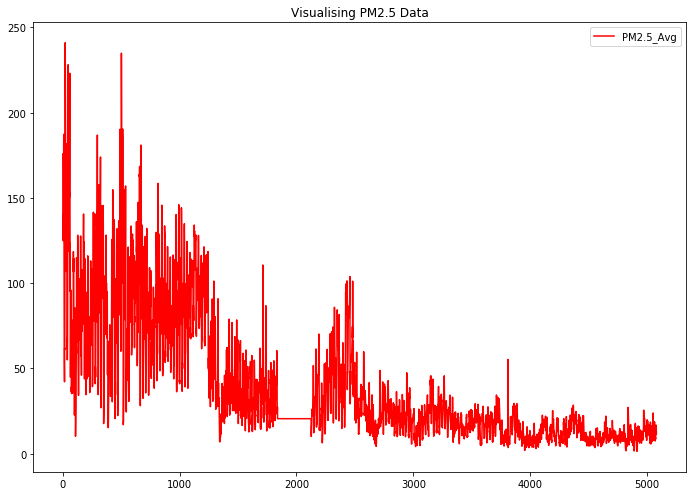

In [25]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

# Visualising the PM 2.5 Values

sns.lineplot(data = df["PM2.5_Avg"], color="red", label="PM2.5_Avg")
plt.title('Visualising PM2.5 Data')
plt.show()

In [26]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Station, Longitude, Latitude, DateTime,  Tmp_Max,  Temp_Min,  Temp_Avg,  RH_Max,  RH_Min,  RH_Avg,  Pre_Max,  Pre_Min,  Pre_Avg,  PP_Max,  PP_Min,  PP_Avg,  Wd_Max,  Wd_Min,  Wd_Avg,  Ws_Max,  Ws_Min,  Ws_Average,  PM2.5_Max,  PM2.5_Min, PM2.5_Avg, AQI_PM2.5, AQI Category]
Index: []

[0 rows x 27 columns]


In [27]:
df = df[df.duplicated() == False]

print(df.shape)

(5082, 27)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5082 entries, 0 to 5081
Data columns (total 27 columns):
Station         5082 non-null object
Longitude       5082 non-null float64
Latitude        5082 non-null float64
DateTime        5082 non-null object
 Tmp_Max        5082 non-null float64
 Temp_Min       5082 non-null float64
 Temp_Avg       5082 non-null float64
 RH_Max         5082 non-null float64
 RH_Min         5082 non-null float64
 RH_Avg         5082 non-null float64
 Pre_Max        5082 non-null float64
 Pre_Min        5082 non-null float64
 Pre_Avg        5082 non-null float64
 PP_Max         5082 non-null float64
 PP_Min         5082 non-null float64
 PP_Avg         5082 non-null float64
 Wd_Max         5082 non-null float64
 Wd_Min         5082 non-null float64
 Wd_Avg         5082 non-null float64
 Ws_Max         5082 non-null float64
 Ws_Min         5082 non-null float64
 Ws_Average     5082 non-null float64
 PM2.5_Max      5082 non-null object
 PM2.5_Min      5082 n

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Longitude,5082.0,85.310000,2.103413e-12,85.310000,85.310000,85.310000,85.310000,85.310000
Latitude,5082.0,27.700000,1.112109e-12,27.700000,27.700000,27.700000,27.700000,27.700000
Tmp_Max,5082.0,18.475817,6.195266e+00,3.400000,13.700000,19.600000,23.175001,31.100000
Temp_Min,5082.0,17.464010,6.055874e+00,3.100000,12.800000,18.299999,22.100000,30.299999
Temp_Avg,5082.0,17.958780,6.118192e+00,3.230000,13.230000,18.930000,22.577500,30.770000
RH_Max,5082.0,78.824695,1.703050e+01,19.299999,67.599998,82.500000,92.300003,100.000000
RH_Min,5082.0,73.836147,1.886871e+01,15.000000,60.599998,76.599998,88.900002,100.000000
RH_Avg,5082.0,76.390384,1.789919e+01,17.110000,64.222500,79.705000,90.607500,100.000000
Pre_Max,5082.0,869.394549,3.758469e+00,859.500000,866.400024,869.799988,872.099976,880.700012
Pre_Min,5082.0,868.932467,3.736325e+00,859.200012,866.000000,869.299988,871.599976,880.500000


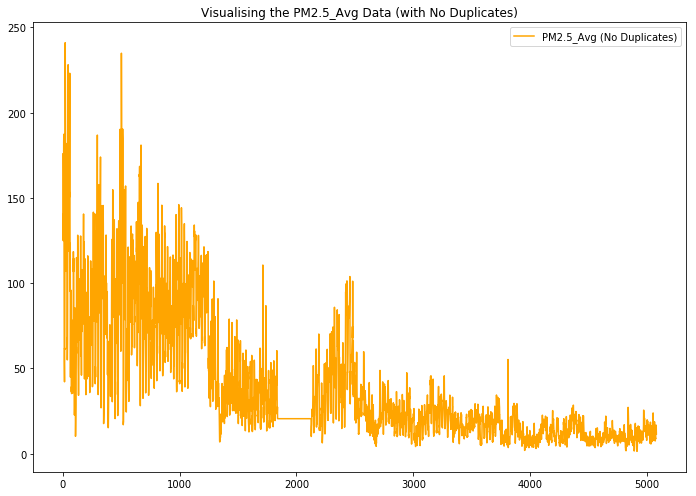

In [30]:
# Visualising the PM 2.5 Values

sns.lineplot(data = df["PM2.5_Avg"], color="orange", label="PM2.5_Avg (No Duplicates)")
plt.title('Visualising the PM2.5_Avg Data (with No Duplicates)')
plt.show()

In [31]:
pm_ = list(df['PM2.5_Avg'])

Acceptable = []

for pm in pm_:
    if pm >= 151:
        Acceptable.append(0)
    else:
        Acceptable.append(1)

df['Acceptable'] = Acceptable

df.sample(3)

,Station,Longitude,Latitude,DateTime,Tmp_Max,Temp_Min,Temp_Avg,RH_Max,RH_Min,RH_Avg,...,Wd_Avg,Ws_Max,Ws_Min,Ws_Average,PM2.5_Max,PM2.5_Min,PM2.5_Avg,AQI_PM2.5,AQI Category,Acceptable
2085,Ratnapark,85.31,27.7,03/27/2020 21,21.299999,21.0,21.18,73.099998,70.199997,71.28,...,293.30,4.0,0.5,1.98,,,20.48,52.0,Moderate,1
625,Ratnapark,85.31,27.7,01/27/2020 01,6.400000,5.6,6.00,93.900002,92.199997,93.07,...,111.31,0.8,0.0,0.34,122.0999985,86.69999695,94.85,168.0,Unhealthy,1
3357,Ratnapark,85.31,27.7,05/20/2020 03,19.400000,19.0,19.13,76.699997,72.400002,73.86,...,47.25,1.1,0.0,0.28,24.20000076,18.20000076,20.64,52.0,Moderate,1


1    5027
0      55
Name: Acceptable, dtype: int64


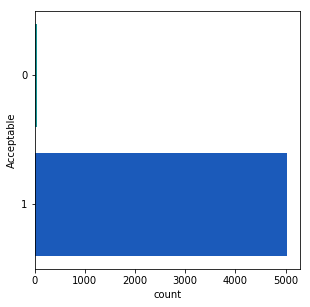

In [32]:
# figure size in inches
rcParams['figure.figsize'] = 4.75,4.75

print(df.Acceptable.value_counts())

sns.countplot(y = "Acceptable", data = df, palette = 'winter_r')
plt.show()

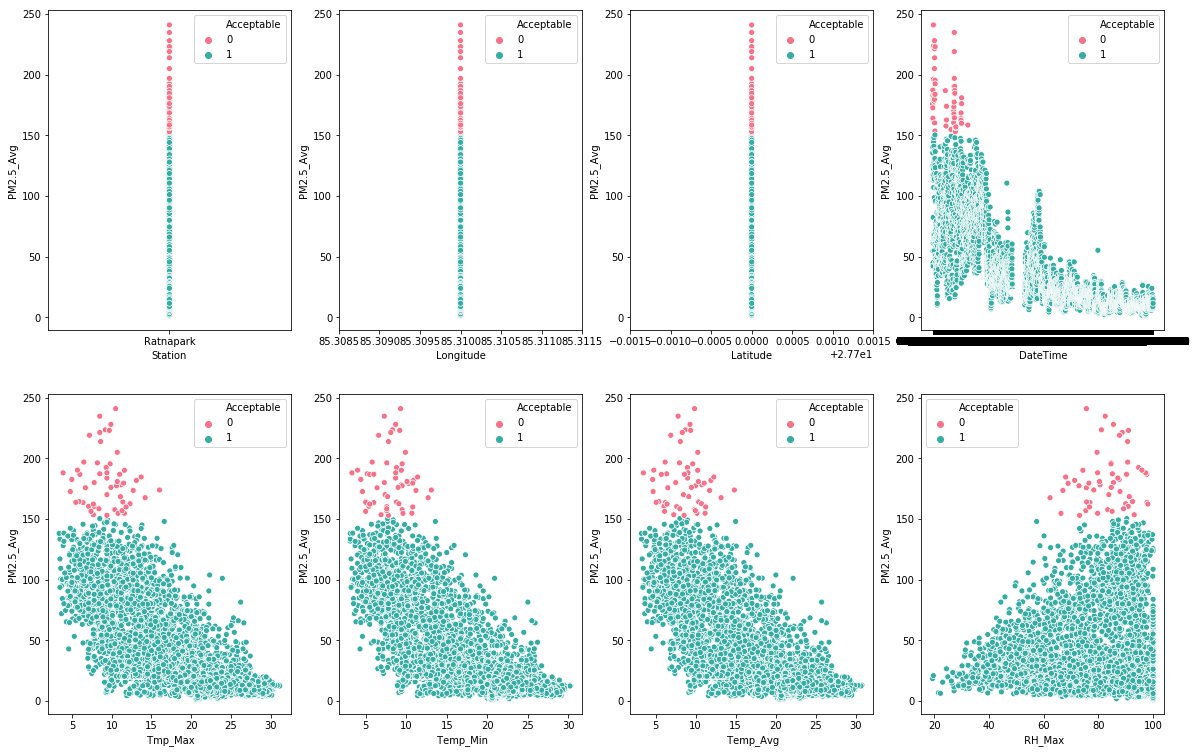

In [34]:
cols =  list(df.columns)

plt.figure(figsize=(20, 20))

for i in range(1, 9):
    plt.subplot(3, 4, i)
    sns.scatterplot(x = cols[i - 1], y = df['PM2.5_Avg'],data = df, hue = "Acceptable", palette = "husl")

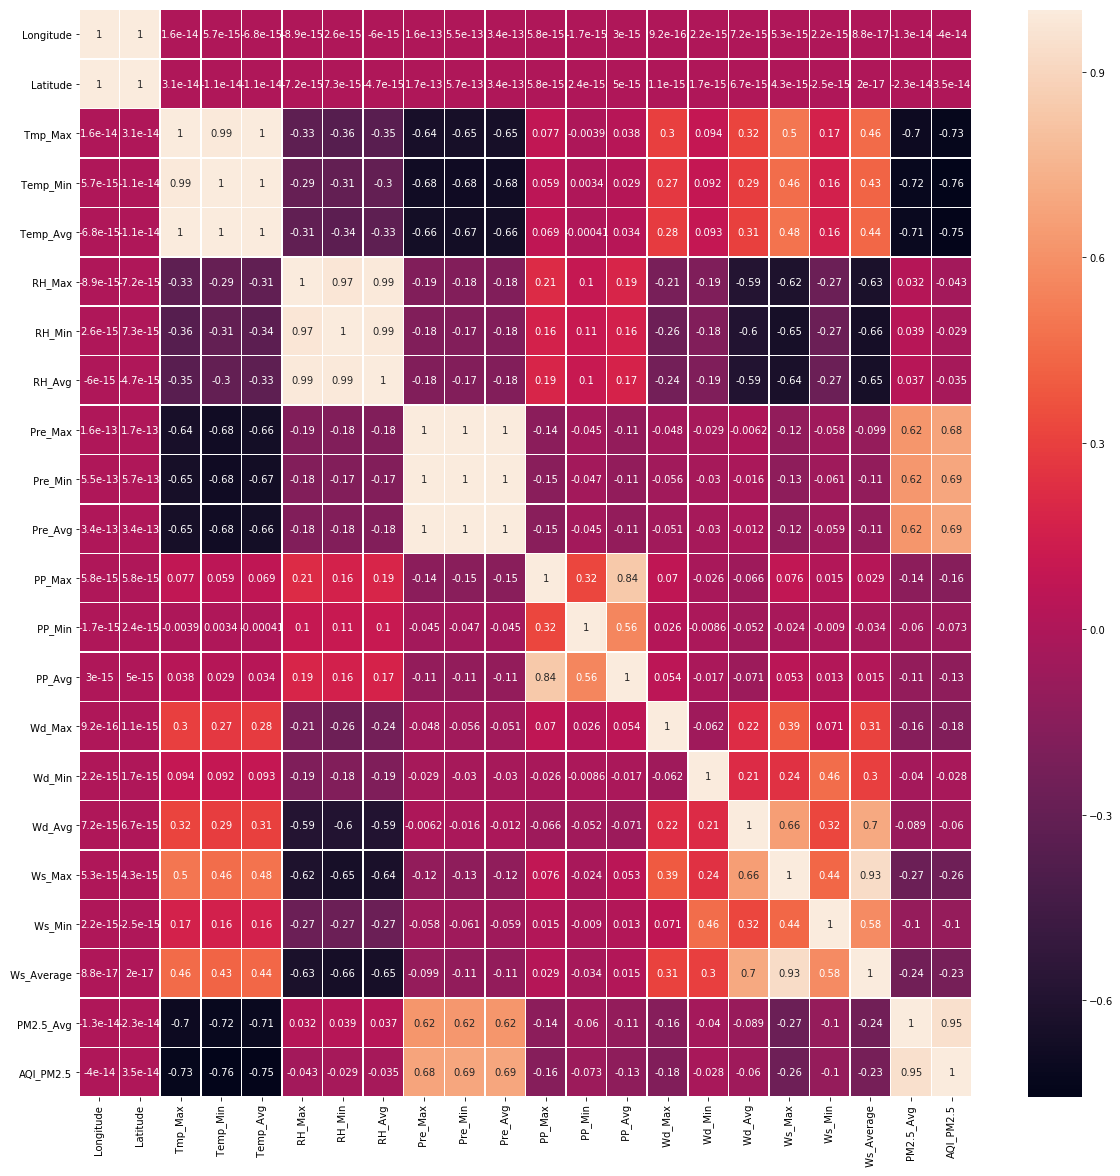

In [36]:
corrmat = df.corr()
top_corr_features = corrmat.index[:-1] # dropping 'Acceptable'

plt.figure(figsize=(20,20))

#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot = True, linewidths=.5)
# print(corrmat)
plt.show()

In [63]:
from sklearn.model_selection import train_test_split

X = df[['Longitude', 'Latitude', ' Tmp_Max', ' Temp_Min',
       ' Temp_Avg', ' RH_Max', ' RH_Min', ' RH_Avg', ' Pre_Max', ' Pre_Min',
       ' Pre_Avg', ' PP_Max', ' PP_Min', ' PP_Avg', ' Wd_Max', ' Wd_Min',
       ' Wd_Avg', ' Ws_Max', ' Ws_Min', ' Ws_Average', 'PM2.5_Avg']]
y = df['AQI_PM2.5']


In [64]:
X.head()

,Longitude,Latitude,Tmp_Max,Temp_Min,Temp_Avg,RH_Max,RH_Min,RH_Avg,Pre_Max,Pre_Min,...,PP_Max,PP_Min,PP_Avg,Wd_Max,Wd_Min,Wd_Avg,Ws_Max,Ws_Min,Ws_Average,PM2.5_Avg
0,85.31,27.7,6.7,6.4,6.53,75.599998,71.699997,73.85,876.200012,875.799988,...,0.0,0.0,0.0,354.7,0.0,106.86,1.2,0.0,0.36,175.77
1,85.31,27.7,6.4,6.0,6.22,76.900002,75.300003,76.30,876.200012,875.799988,...,0.0,0.0,0.0,355.2,0.0,110.05,1.3,0.0,0.35,163.59
2,85.31,27.7,6.6,5.8,6.25,79.400002,76.300003,78.21,876.500000,876.400024,...,0.0,0.0,0.0,348.7,0.0,116.30,1.5,0.0,0.54,135.97
3,85.31,27.7,6.0,5.1,5.61,81.400002,77.099998,78.57,876.700012,876.700012,...,0.0,0.0,0.0,242.7,0.0,131.14,1.1,0.0,0.47,124.88
4,85.31,27.7,5.2,4.6,4.92,85.199997,82.300003,83.74,876.799988,876.700012,...,0.0,0.0,0.0,335.6,0.0,90.11,0.7,0.0,0.28,140.43


In [65]:
y.head()

0    217.0
1    204.0
2    188.0
3    183.0
4    190.0
Name: AQI_PM2.5, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [57]:
print('Length of X_train', len(X_train))
print('Length of X_val', len(X_val))
print('Length of y_train', len(y_train))
print('Length of y_val', len(y_val))

Length of X_train 4573
Length of X_val 509
Length of y_train 4573
Length of y_val 509


In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print("lr.score : ", lr.score(X_val, y_val))
print("lr.coef_ : ",lr.coef_)
print("lr.intercept_ : ",lr.intercept_)

lr.score :  0.9341269560809901
lr.coef_ :  [ 0.00000000e+00  3.08642001e-14 -3.61894937e+00 -5.58628104e+00
  7.48465333e+00 -1.09750381e+00 -5.47680134e-01  1.19531135e+00
  1.97596197e+00  4.13395190e+00 -5.46578808e+00 -1.28216285e-01
 -4.05445903e+00  5.94901070e-01 -1.86055439e-02  2.03029297e-02
  2.12137940e-02 -5.14019174e-01 -4.33099055e+00 -3.21321116e+00
  1.23316219e+00]
lr.intercept_ :  -454.2800499924175


In [59]:
print("lr.score of training data: ", lr.score(X_train, y_train))

lr.score of training data:  0.9336004691059


In [60]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr , X, y, cv = 5)

print(score)
print("Mean score : ",score.mean())

[-0.18756006  0.86288113  0.79469588  0.78075051  0.72865011]
Mean score :  0.5958835116139148


In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [69]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9998537816975518


In [70]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9977957550351365


In [71]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [72]:
score.mean()

0.980498256813609

In [73]:
prediction=regressor.predict(X_test)

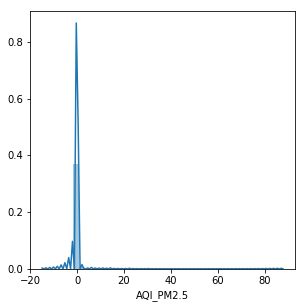

In [74]:
sns.distplot(y_test-prediction)

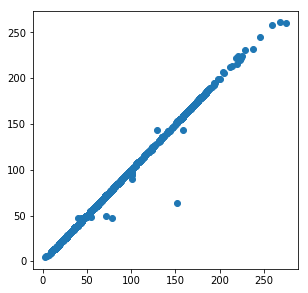

In [75]:
plt.scatter(y_test,prediction)

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.22301639344262264
MSE: 6.738039344262295
RMSE: 2.595773361497936


In [61]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Longitude,0.000000e+00
Latitude,3.086420e-14
Tmp_Max,-3.618949e+00
Temp_Min,-5.586281e+00
Temp_Avg,7.484653e+00
RH_Max,-1.097504e+00
RH_Min,-5.476801e-01
RH_Avg,1.195311e+00
Pre_Max,1.975962e+00
Pre_Min,4.133952e+00


In [62]:
from sklearn import metrics

prediction = lr.predict(X_val)

print('MAE:', metrics.mean_absolute_error(y_val, prediction))
print('MSE:', metrics.mean_squared_error(y_val, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, prediction)))

MAE: 10.76924759238674
MSE: 209.98751536245405
RMSE: 14.490945978867426
